# Reanalysis ERA5-Land HOURLY data (from 1981 to present)
## Download, Mapping, daily/monthly aggregation and time serie extraction (from Copernicus "Climate Data Store")
HOURLY Precipitations, temperature, evaporation, runoff and other parameters.

- Data: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview
- ERA5-Land documentation: https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation

author: Loïc Duffar https://github.com/loicduffar

### How to PROCEED ?
Run cells in order (red stars <font color="red">*</font> indicate major steps):
- <a href=#section01>1)</a><font color="red">*</font> Data download (Download volume is limited by the server: you will have to adapt number of variables, the périod of time and the area and/or to split the request in several files)
- 1bis)<font color="red">*</font> Edit and run the 2nd cell, instead of the 1rst one IF the ERA5 file is already downloaded
- <a href=#section02>2)</a><font color="red">*</font> Customization, initialization and display netCDF file infos
- <a href=#section03>3)</a><font color="red">*</font> Plot maps by hour/day/month and interannual average
- <a href=#section04>4)</a><font color="red">*</font> Plot and export dailly time serie for one pixel and for a possible polygon
- <a href=#section05>5)</a> Animation maps by month, day and hour
- 5bis) Animation maps by day and hour OVER A SELECTED PERIOD OF TIME. (Use this cell instead of the one above if the navigation through the hourly data is difficult because of a file covering a very long duration; 10 years for example).

### How to AUTHORIZE the execution of the python code on Windows ? (only once)
https://cds.climate.copernicus.eu/api-how-to

- If you do not have an account, please register on the CDS registration page
- Log in
- Copy the <a href="https://cds.climate.copernicus.eu/api-how-to">code with your personal key</a> (see below), into the file "USER/.cdsapirc" (in Windows environment)
(The file starting with a dot can be created using Notepad: "File> Save as> Type: All files> File name: .cdsfapirc"

    url: https://cds.climate.copernicus.eu/api/v2     
    key: 59908: 86be7b48-b82a-4b47-8167-d58223c86112

###  How to CREDIT data ?
Where the Licensee communicates or distributes Copernicus Products to the public, the Licensee shall inform the recipients of the source by using the following or any similar notice:

"Generated using Copernicus Climate Change Service information [Year]"

### <a name=section01></a>1) Data download
- 1. customize the code below to choose the product (here 'hourly ERA5-Land reanalysis'), the variable (e.g. 'total_precipitation', 'potential_evaporation' etc...), period of years, aera limits (lat/lon min and max) and file name (with the right extension grid or nc).
- NOTA: Download volume is limited by the server: you will have to adapt the périod of time and the area and/or to split the request in several files
- 2. Run the frist cell to download the file. The running time is displayed at the end of the process (You can view the job survey here: https://cds.climate.copernicus.eu/live/queue). NB: the server running time can be 5h for one variable, 11 years, 24 hours a day and an area of 200x200 km
- If the file is already downloaded, you don't need to download it again. Just edit and run the second cell instead of the first one, and process the data starting with the 3rd cell

In [21]:
"""
Created on Sept 2020
@author: Loïc Duffar
"""
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=form

import cdsapi
import timeit
import os

#++++++++++++ Customization
file_format = 'netcdf'  # 'grib' or 'netcdf' (but ONLY netcdf is supported by the code below for mapping and time serie extraction)
folder_out = r'D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land'
downloaded_file = 'ERA5-Land hourly.nc'

# ....... AREA to extract
lat_min, lat_max, lon_min, lon_max =[6., 10., 79.71, 81.88]# SRI LANKA
lat_min, lat_max, lon_min, lon_max =[17.5, 20.1, -74.5, -68.3]# HAITI
lat_min, lat_max, lon_min, lon_max =[41.2, 51.14, -4.9, 10.]# FRANCE
lat_min, lat_max, lon_min, lon_max =[35.37, 71.55, -9.66, 49.5]# EUROPA
lat_min, lat_max, lon_min, lon_max =[-35.5, 37.4, -25.2, 55.95]# AFRICA
lat_min, lat_max, lon_min, lon_max =[-56., 25.5, -92.15, -34.5]# SOUTH & CENTRAL AMERICA
lat_min, lat_max, lon_min, lon_max =[-11.3, 60.5, 31.9, 180.]# ASIA
lat_min, lat_max, lon_min, lon_max =[42.9, 45.1, 4.6, 7.55]# FRANCE PACA

# ....... TIME PERIOD to extract
start_year = 2010                                            # from 1981 
end_year = 2020                                              # to present year

# ....... VARIABLE(S) to extract: single name or list of names among those below
#         - total_precipitation, surface_runoff,  runoff, snow_depth_water_equivalent (m)
#         - 2m_temperature (K)
#         - potential_evaporation, total_evaporation, evaporation_from_open_water_surfaces_excluding_ocean, evaporation_from_bare_soil (m negative)
variables_list = 'total_precipitation'
'''
variables_list = ['total_precipitation',
                  'surface_runoff',
                  'snow_depth_water_equivalent',
                  '2m_temperature',
                  'potential_evaporation', 'total_evaporation', 'evaporation_from_open_water_surfaces_excluding_ocean',
                 ]
'''
#++++++++++++ Download
downloaded_file = os.path.join(folder_out, downloaded_file)
years = [ str(start_year +i ) for i in range(end_year - start_year + 1)] 
start_day = 1
end_day = 31
days = [ str(start_day +i ).zfill(2) for i in range(end_day - start_day + 1)]

print('Process started. Please wait the ending message ... ')
start = timeit.default_timer()

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'year': years,
        'variable': variables_list,
        'month': [ '01', '02', '03',
                   '04', '05', '06',
                   '07', '08', '09',
                   '10', '11', '12',],
        'day': days,
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [ lat_min, lon_min, lat_max, lon_max ],
        'format': file_format,
    },
    downloaded_file)

stop = timeit.default_timer()
print('Process completed in ', (stop - start)/60, ' minutes')

2020-12-27 17:46:37,958 INFO Welcome to the CDS
2020-12-27 17:46:37,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land


Process started. Please wait the ending message ... 


2020-12-27 17:46:38,076 INFO Request is completed
2020-12-27 17:46:38,077 INFO Downloading https://download-0004.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1609069101.168627-26615-3-a101fa6e-84de-4d6c-813d-1eea14536a2b.nc to D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land\ERA5-Land hourly.nc (125.3M)
2020-12-27 17:46:49,806 INFO Download rate 10.7M/s                                                                     


Process completed in  0.2014390497999557  minutes


### 1bis) Edit and run this cell, instead of the first one ONLY IF the file is already downloaded
- Enter the infos for the already donwloaded file (folder ans file name, variable and geographic area)

In [80]:
# Customization
import os
import timeit

# +++++++ Customization
folder_out = r'D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land\ERA5-Land hourly total_precipitation data from 1981'
downloaded_file = 'ERA5-Land hourly total_precipitation 2010-2020 PACA.nc'
variable = 'total_precipitation'

# +++++++ Initialisation
downloaded_file = os.path.join(folder_out, downloaded_file)

### <a name=section02></a>2) Customization, initialization and display netCDF file infos
- Define the variable and the geographic area to use (the file can contain more than one variable and a larger area) 
- Define a polygon file for average computation and a vector file for map wrapping (points, lines, polygons). The CRS of the files must be WGS84 (coordinate reference system)
- Run the cell to display file infos

NB: Currently works only for some parameters (see code below). For more parameters, the code below has to be adapted with the correct name in addition to "tp", "ro", "sd", "t2m", "pev", "e", "evaow", "evabs" etc...

In [73]:
import netCDF4
import xarray as xr
import rioxarray
import geopandas as gpd
import hvplot.xarray
#import plotly.express as px
import cartopy
print('Cartopy version: ', cartopy.__version__)

# +++++++ Customization
# ------- Choose  the data (the file can contain more than one variable, a larger area and a longer time period)
# . . . . Choose one variable in the file
variable = 'total_precipitation' 
# . . . . Area clipping. [None, None, None, None] for no clipping
lat_min, lat_max, lon_min, lon_max =[42.9, 45.1, 4.6, 7.55]# FRANCE PACA
# . . . . Périod of time
date_start = '2019-11-01'# date without time (anlyse will begin at 0:00)
date_end ='2019-12-31'# date without time (anlyse will end at 23:00)

# -------  Vector files (shape files, or any format supported by geopandas). Path must include folder
# . . . . polygon file for plotting and average computation
polygon_file = r'C:\Users\duffar\Documents\A\ETUDES\carto\Sites_projets\_Shapefiles à regouper\BV_Laye au barrage.shp'
# . . . . Shape file (point, line or polygon) for plotting
wrapping_file = r'C:\Users\duffar\Documents\A\ETUDES\carto\Sites_projets\Rhone-Durance-Verdon\RH_Durance, Bléone, Jabron.shp'

# +++++++ Initialisation according to parameter
proj = cartopy.crs.PlateCarree()
cmap = 'jet'
res = '10m'                  # resolution for naturalearth tile map with cartopy: 10m, 50m or 110m (10m = 1/ 10 000 000)
nlevels = 9                  # number of contour levels for maps
hvplot_width = 500           # width in pixel for hv_plot
gdf_polyg = gpd.read_file(polygon_file) if os.path.exists(polygon_file) else None
gdf_wrapping = gpd.read_file(wrapping_file) if os.path.exists(wrapping_file) else None
facet_plot_subset_file = 'ERA5 Hourly - Hourly, daily, monthly or averaged by month.png'

# +++++++ Display file info
print('File info by netCDF4')
print('====================')
in_nc = netCDF4.Dataset(downloaded_file) # read netCDF object
display(in_nc) # print file information

print('File info by xarray')
print('====================')
xarray_src = xr.open_dataset(downloaded_file)
display(xarray_src) # print file information

# +++++++ Area clipping
if lat_min!=None and lat_max!=None and lon_min!=None and lon_max!=None:
    #xarray_src.rio.set_crs('epsg:4326')
    #xarray_src = xarray_src.rio.clip_box(lon_min, lat_min, lon_max, lat_max)
    mask_lon = (xarray_src.longitude >= lon_min) & (xarray_src.longitude <= lon_max)
    mask_lat = (xarray_src.latitude >= lat_min) & (xarray_src.latitude <= lat_max)
    xarray_src = xarray_src.where(mask_lon & mask_lat, drop=True)

# +++++++ Unit conversion
# https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation
param_mean = ['sd', 't2m']    # parameters to be averaged by time step (not summed)
param_negative = ['pev', 'e', 'evaow', 'evabs']    # negative parameters to be transform positive
param_cumul = ['tp'] # Cumlulative parameters over 24h until 00:00 the next day 
                    # https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation
                    # https://confluence.ecmwf.int/display/CUSF/Total+Precipitation+%5BValues+not+in+range%5D+-+ERA5-Land+hourly+data+from+1981+to+present?desktop=true&macroName=view-file
                    # https://cds.climate.copernicus.eu/toolbox/doc/tutorials/3_create_a_climate_graph_application_for_any_point_location/3_create_a_climate_graph_application_for_any_point_location.html#b-retrieve-era5-hourly-data-on-single-levels-total-precipitation
param_meter = ['tp', 'sro', 'ssro', 'ro', 'sd', 'pev', 'e', 'evaow', 'evabs']# Parameters in meter to be converted in mm
param_temp = ['t2m']

if variable=='total_precipitation':
    param = 'tp'
elif variable=='surface_runoff':
    param = 'sro'
elif variable=='sub_surface_runoff':
    param = 'ssro'
elif variable=='runoff':
    param = 'ro'
elif variable=='2m_temperature':
    param = 't2m'
elif variable=='snow_depth_water_equivalent':# Implementation to be confirmed
    param = 'sd'
elif variable=='potential_evaporation':
    param = 'pev'
elif variable=='total_evaporation':
    param = 'e'
elif variable=='evaporation_from_open_water_surfaces_excluding_oceans':
    param = 'evaow'
elif variable=='evaporation_from_bare_soil':
    param = 'evabs'
else:
    print("EXECUTION ABORTED because the script currently works only for total_precipitation, surface_runoff, sub_surface_runoff, runoff, 2m_temperature, snow_depth_water_equivalent, potential_evaporation, total_evaporation, evaporation_from_open_water_surfaces_excluding_ocean and evaporation_from_bare_soil")
    quit()

long_name = xarray_src[param].attrs['long_name']
units = xarray_src[param].attrs['units']
if param in param_temp:
    xarray_src = xarray_src  - 273.15
    units = '°C'
    
if param in param_negative:
    xarray_src = xarray_src  * -1.

if param in param_mean and param in param_meter:
    # Converts m to mm (without time step correction) e.g. monthly averaged snow stock in m/day does not has to be summed over month nor over year
    xarray_src = xarray_src  * 1000. 
    units = 'mm'
elif param in param_meter:
    # Converts m/day to mm/month (https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation)
    xarray_src = xarray_src * 1000. 
    units = 'mm'

xarray_src[param].attrs.update(units=units, long_name=long_name)

Cartopy version:  0.17.0
File info by netCDF4


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-12-27 16:38:18 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1609069101.168627-26615-3-a101fa6e-84de-4d6c-813d-1eea14536a2b.nc /cache/tmp/a101fa6e-84de-4d6c-813d-1eea14536a2b-adaptor.mars.internal-1609069101.169308-26615-2-tmp.grib
    dimensions(sizes): longitude(30), latitude(23), time(94969)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 tp(time,latitude,longitude)
    groups: 

File info by xarray


<xarray.Dataset>
Dimensions:    (latitude: 23, longitude: 30, time: 94969)
Coordinates:
  * longitude  (longitude) float32 4.6 4.7 4.8 4.9 5.0 ... 7.1 7.2 7.3 7.4 7.5
  * latitude   (latitude) float32 45.1 45.0 44.9 44.8 ... 43.2 43.1 43.0 42.9
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-11-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-27 16:38:18 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### <a name=section03></a>3) Plot synthetis maps by hour/day/month and interannual average
- Run this cell to plot synthetis maps : average and multiple maps (by day, month or averaged by month, depending on the length of the period)

Outputs below are saved in the user defined folder:
- Average raster saved as a geotif file
- Average map saved as html file
- Multiple maps saved as png file

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Image.I    :Image   [longitude,latitude]   (tp)
   .Contours.I :Contours   [longitude,latitude]   (tp)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Path.I     :Path   [Longitude,Latitude]

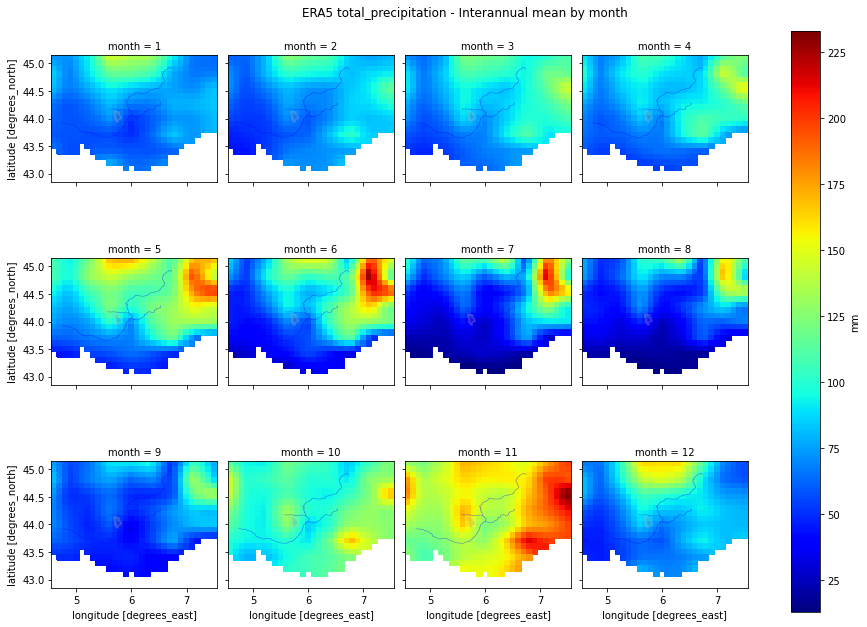

In [71]:
"""
Created on december 2020
@author: Loïc Duffar
"""
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import pandas as pd
import datetime

pd.options.plotting.backend = "matplotlib"# restore default pandas backend (matplotlib) in case plotly have been substituate before

# ========= Daily/monthly aggregation AND averages the results over the entire period
if param in param_cumul:
    da_daily = xarray_src[param].resample(indexer=dict(time='D')).first()
    da_daily = da_daily.shift(shifts=dict(time= -1))
    da_daily = da_daily.drop_sel(time=da_daily['time'].isel(time=len(da_daily['time'])-1).values)
else:
    if param in param_mean:
        da_daily = xarray_src[param].resample(indexer=dict(time='D')).mean('time', skipna=False)
    else:
        da_daily = xarray_src[param].resample(indexer=dict(time='D')).sum('time', skipna=False)

if param in param_mean:
    da_monthly = da_daily.resample(indexer=dict(time='M')).mean('time', skipna=False)
else:
    da_monthly = da_daily.resample(indexer=dict(time='M')).sum('time', skipna=False)
da_average = da_monthly.mean('time', skipna=False)

# ========= Save the average raster to geotif file
average_file = 'EA5 hourly data averaged'
da_average.rio.to_raster(os.path.join(folder_out, average_file + '.tif'))

# ========= Display and save the plot of average map
# .......... plot by HVPLOT
hv_plot1 = da_average.hvplot(x='longitude', y='latitude',
                             width=hvplot_width, alpha=0.6, geo= True,  crs= proj, 
                             tiles='CartoLight',  # CartoLight, StamenTerrain, StamenTerrainRetina, EsriTerrain, EsriNatGeo
#                             coastline= '10m',
                             cmap= cmap, clabel= units, title='ERA5 '+ variable + ' - Hourly data averaged over the entire period',
                            )
hv_plot2 = da_average.hvplot.contour(x='longitude', y='latitude',
                                     width=hvplot_width, geo= True,  crs= proj,
                                     levels=nlevels, line_width=2, cmap='blues',
                                     )
hv_plot = hv_plot1 * hv_plot2
if gdf_polyg is not None:
    hv_plot3 = gdf_polyg.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=0.2)
    hv_plot = hv_plot * hv_plot3
if gdf_wrapping is not None:
    hv_plot4 = gdf_wrapping.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=1, color='blue', )
    hv_plot = hv_plot * hv_plot4
hvplot.save(hv_plot, os.path.join(folder_out, 'ERA5 hourly data averaged.html'))

'''
# .......... plot by CARTOPY
display(interannual_average)
ax = plt.subplot( projection=proj)
plot = interannual_average.plot.pcolormesh('longitude', 'latitude', ax=ax)
#print(plot)
#ax = plt.gca()

ax.coastlines(resolution=res)
'''

# ========= Facet plot maps by day (if 31 days or less), or by month (if between 32 and 356 days) or averaged by month (if more than 365 days)
nb_days = len(da_daily['time'])
if nb_days<=31:
    grid = da_daily.plot(col= 'time', subplot_kws= dict(transform= proj), col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)
    temp =  ' - Daily'
elif nb_days<=365:
    grid = da_monthly.plot(col= 'time', subplot_kws= dict(transform= proj), col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)
    temp = ' - Monthly'
else:
    grid = da_monthly.groupby('time.month').mean('time').plot(col= 'month', subplot_kws= dict(transform= proj), col_wrap= 4, 
                                                       cmap= cmap, cbar_kwargs={"label": units},)
    temp = ' - Interannual mean by month'

for ax in grid.axes.flat:
    if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.2)
    if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5, color='blue', linewidth=0.5,) 
plt.gcf().suptitle('ERA5 '+ variable + temp, y=1)
facet_plot_file = 'ERA5 Hourly - Agregate by day or by month or averaged.png'
plt.savefig(os.path.join(folder_out, facet_plot_file))

hv_plot

### <a name=section04></a>4) Plot and export dailly time serie for one pixel and for a possible polygon
- Customize the coordinate (latitude, longitude) of the point for time serie extraction
- Run the file to export time series for the choosen point and for the possible polygon (as well as corresponding graphs)

NB: 
- Please be patient if you entered a polygon file. Extraction of the time serie may take a long time if the hourly data covers several years (10 minutes for 10 years).
- An excel file is saved in the user defined output directory, and contains numeric timeseries (monthly and yearly), corresponding graphs as well as some maps.

Plotly version:  4.14.1
Process started. Please wait the ending message ... 
2020-12-31 21:57:20.924658


C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\rasterstats\io.py:301: UserWarning:

Setting nodata to -999; specify nodata explicitly



C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.

C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



2020-12-31 22:08:45.131482
Process completed in  11.403111072299968  minutes


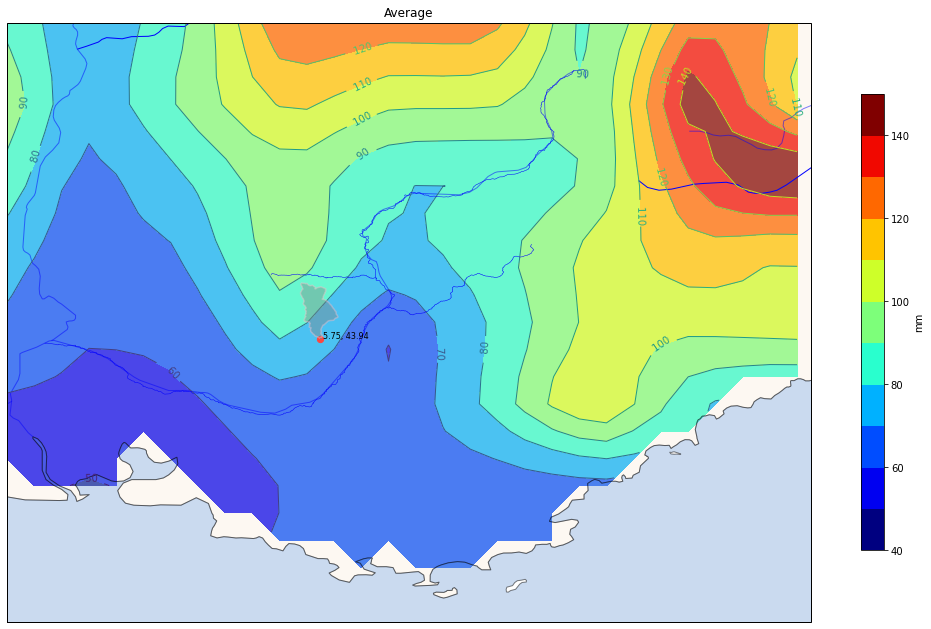

In [91]:
"""
Created on december 2020
@author: Loïc Duffar
"""
import numpy as np
import rasterstats
import cartopy.feature as cfeature
import plotly
import plotly.graph_objects as go
import plotly.express as px
import affine

print('Plotly version: ', plotly.__version__)

pd.options.plotting.backend = "plotly"# replace default pandas backend (matplotlib) by plotly
print('Process started. Please wait the ending message ... ')
start = timeit.default_timer()
print(datetime.datetime.now())

# +++++++ Customization: Point from where to extract time serie
lat, lon = [8.35, 17.73] # TCHAD Moissala 
lat, lon = [7.7, 81.6]# SRI LANKA Batticaloa
lat, lon = [43.5, 5.4]# FRANCE PACA Aix 
lat, lon = [43.54, 5.54]# FRANCE PACA Bimont barrage
lat, lon = [43.94, 5.75]# FRANCE PACA La Laye barrage

# ++++++++++ time series extraction and daily/monthly aggregation (and computation of total by year and interannual average)
# ---------- ...from point
time_serie_hourly = xarray_src[param].sel(longitude=lon, latitude=lat, method="nearest", tolerance=0.051)# tolerance of 1/2 latitude and longitude step (0.1 degree) 
time_serie_daily = da_daily.sel(longitude=lon, latitude=lat, method="nearest", tolerance=0.051)# toterance of 1/2 latitude and longitude step (0.1 degree) 

nround = 2
col_point = str(lon) + ', ' + str(lat)
df_hourly = time_serie_hourly.to_dataframe().round(nround)
df_hourly.drop(labels=['latitude', 'longitude'], axis=1, inplace=True)
df_hourly.rename(columns= {param: col_point}, inplace=True)

df_daily = time_serie_daily.to_dataframe().round(nround)
df_daily.drop(labels=['latitude', 'longitude'], axis=1, inplace=True)
df_daily.rename(columns= {param: col_point}, inplace=True)
    
if param in param_mean:
    df_monthly = df_daily.resample('M', label='right').mean().round(nround)
else:
    df_monthly = df_daily.resample('M', label='right').sum().round(nround)

# ---------- ...from polygon
col_polyg = None
if gdf_polyg is not None:
    col_polyg = 'Polygon'
    affine_obj = affine.Affine(0.1, 0, xarray_src['longitude'][0].values, 0, -0.1, xarray_src['latitude'][0].values)
    ts_polyg_hourly = []
    for date in xarray_src['time'].values:
        date_string = str(date)[:19]
        raster = xarray_src[param].sel(time= date_string).values
        stats = rasterstats.zonal_stats(gdf_polyg, raster, affine= affine_obj, stats= ['mean'])
        ts_polyg_hourly.append(round(stats[0]['mean'], nround))
    df_hourly[col_polyg] = ts_polyg_hourly
    
    ts_polyg_daily = []
    for date in da_daily['time'].values:
        date_string = str(date)[:19]
        raster = da_daily.sel(time= date_string).values
        stats = rasterstats.zonal_stats(gdf_polyg, raster, affine= affine_obj, stats= ['mean'])
        ts_polyg_daily.append(round(stats[0]['mean'], nround))
    df_daily[col_polyg] = ts_polyg_daily

    ts_polyg_monthly = []
    for date in da_monthly['time'].values:
        date_string = str(date)[:19]
        raster = da_monthly.sel(time= date_string).values
        stats = rasterstats.zonal_stats(gdf_polyg, raster, affine= affine_obj, stats= ['mean'])
        ts_polyg_monthly.append(round(stats[0]['mean'], nround))
    df_monthly[col_polyg] = ts_polyg_monthly
    
# +++++++++++ Display monthly values in columns by month
tables = []
df_monthly['MONTH'] = df_monthly.index.month
df_monthly['YEAR'] = df_monthly.index.year
for par in [col_point, col_polyg]:
    if par is not None: 
        table = df_monthly[[par, 'MONTH', 'YEAR']]
        table = table.pivot_table(values= par, index='YEAR', columns='MONTH')    # convert long-form dataframe to wide-form
        if par in param_mean:
            table['Mean'] = table.apply(func=np.mean, axis='columns')            # compute and add annual average
        else:
            table['Total'] = table.apply(func=np.sum, axis='columns')            # compute and add annual sum
        avg = table.mean()                                                       # compute interannual average
        # A CORRIGER: ne marche pas car avg est une Serie et non un DataFrame
        table.append(avg.rename('Mean', inplace=True, axis='index'))             # add this average as a row of table
        #display(table)
        tables.append(table.round(nround))
df_monthly.drop(labels=['MONTH', 'YEAR'], axis=1, inplace=True)
    
# ++++++++++ plot time series
# ---------- hvplot
#graph = time_serie.hvplot(title='Monthly timeserie',)                 
# ---------- plotly (if backend has been change at the beginning)
# . . . . .  Plot time serie graphs
colors= px.colors.qualitative.D3
prefix = 'ERA5 '+ variable
fig = df_daily.plot(width=950, height=400, labels={'value': units}, color_discrete_sequence= colors, 
              title=prefix+' - Daily time serie')
fig2 = df_monthly.plot(width=950, height=400, labels={'value': units}, color_discrete_sequence= colors, 
                title=prefix+' - Monthly time serie')
fig.update_layout(title_x=0.5)
fig2.update_layout(title_x=0.5)
# . . . . .  Plot correlation between point and polygon
if gdf_polyg is not None:
    fig3 = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=("Daily", "Monthly"))
    fig3.update_xaxes(title=col_point)
    fig3.update_yaxes(title=col_polyg)
    fig3.update_layout(height=500, width=900, showlegend=False, title_text="Correlation between point and polygon",
                      title_x=0.5)
    
    trace = go.Scatter(x=df_daily[col_point], y=df_daily[col_polyg], mode='markers', marker_color=colors[2], marker_opacity= 0.5)
    fig3.add_trace(trace, row=1, col=1)
    fig_trendline = px.scatter(df_daily, x=col_point, y=col_polyg, trendline='ols', trendline_color_override='grey')
    fig3.add_trace(fig_trendline.data[1], row=1, col=1)
    results = px.get_trendline_results(fig_trendline)
    params = results.iloc[0]['px_fit_results'].params
    text = 'y = {:7.3f} x + {:7.3f}'.format(params[1], params[0])
    fig3.add_annotation(x=0.05, y=0.95, xref= 'paper', yref= 'paper', text=text, showarrow= False)
    
    trace = go.Scatter(x=df_monthly[col_point], y=df_monthly[col_polyg], mode='markers', marker_color=colors[6])
    fig3.add_trace(trace, row=1, col=2)
    fig_trendline = px.scatter(df_monthly, x=col_point, y=col_polyg, trendline='ols', trendline_color_override='grey')
    fig3.add_trace(fig_trendline.data[1], row=1, col=2)
    results = px.get_trendline_results(fig_trendline)
    params = results.iloc[0]['px_fit_results'].params
    text = 'y = {:7.3f} x + {:7.3f}'.format(params[1], params[0])
    fig3.add_annotation(x=df_monthly[col_point].min(), y=df_monthly[col_polyg].max(), text=text, showarrow= False, row= 1,  col= 2)

# . . . . . Save graphs
if not os.path.exists(folder_out): os.mkdir(folder_out)
daily_graph_file = os.path.join(folder_out, 'ERA5 daily.png')
monthly_graph_file = os.path.join(folder_out, 'ERA5 monthly.png')
correlation_graph_file = os.path.join(folder_out, 'ERA5 correlation pixel_polygon-averaged.png')
fig.write_image(daily_graph_file)
fig2.write_image(monthly_graph_file)
fig.show()
fig2.show()
if gdf_polyg is not None:
    fig3.write_image(correlation_graph_file)
    fig3.show()

# ++++++++++ Plot interannual average map (again... but this one is exportable and it shows the pixel corresponding to timeserie)
#----------- Options
fill_contours = True
plot_raingauges = True
raingauge_name = False
shape_files = True
#------------ Plot and map setup
border = 0
x_ext = (lon_max - lon_min) * border
y_ext = (lat_max - lat_min) * border
proj = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(projection= proj)
ax.set_extent([lon_min-x_ext, lon_max+x_ext, lat_min-y_ext, lat_max+y_ext], crs=proj)
#------------- plot contours
if fill_contours:
    cs1 = xr.plot.contourf(da_average, 'longitude', 'latitude', ax=ax, levels=nlevels+2, cmap=plt.cm.jet, alpha=1,
                            cbar_kwargs=dict(shrink=0.6, label=units))# contour fills
cs2 = xr.plot.contour(da_average, 'longitude', 'latitude', ax=ax, levels=nlevels+2, linewidths=1)# contour allows to plot contour lines (contourf does not) 
plt.clabel(cs2, fontsize=10, fmt='%4d', inline=True)
#cb = plt.colorbar(cs1, shrink=0.6)
#cb.set_label(units)
#------------- plot the pixel point
plt.scatter(lon,lat, s=40, color='red')
text = '{:4.2f}, {:4.2f}'.format(lon, lat)
plt.annotate(text, (lon,lat), xytext=(3,0), textcoords='offset points', fontsize=8, color='black', \
             arrowprops=dict(arrowstyle='-', color='grey') )
#------------- Map customization (Polygon and shape file)
if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.4)
if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', color='blue', linewidth=0.5,) 
#------------- Map wrapping (NaturalEarth)
res = '10m' # 10m, 50m or 110m (10m = 1/ 10 000 000)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', res, facecolor='antiquewhite', edgecolor='black'),\
                alpha=0.3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', 
                edgecolor='blue'), alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor='blue'))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', res, facecolor=cfeature.COLORS['water'], edgecolor='blue'), \
                alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', res, facecolor=cfeature.COLORS['water'], edgecolor='black'), \
                alpha=0.5)
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastlines', res, facecolor='none', edgecolor='black'))
#ax.coastlines(resolution=res)
plt.title(('Average'), loc='center')
plt.savefig(os.path.join(folder_out, average_file+'.png'), dpi=150)

# ++++++++++ Save the data and graphs in excel file
excel_file = 'ERA5 timeserie.xlsx'
writer = pd.ExcelWriter(os.path.join(folder_out, os.path.join(folder_out, excel_file)), engine= 'xlsxwriter')
workbook  = writer.book
#--------------- Hourly
df_hourly.to_excel(writer, sheet_name='Hourly', startrow=3, engine= 'xlsxwriter')
worksheet = writer.sheets['Hourly']
worksheet.write('A1', 'Param.=')
worksheet.write('A2', 'Unit=')
worksheet.write('B1', param)
worksheet.write('B2', units)
#--------------- Daily
df_daily.to_excel(writer, sheet_name='Daily', startrow=3, engine= 'xlsxwriter')
worksheet = writer.sheets['Daily']
worksheet.write('A1', 'Param.=')
worksheet.write('A2', 'Unit=')
worksheet.write('B1', param)
worksheet.write('B2', units)
if os.path.exists(daily_graph_file):
    worksheet.insert_image('D1', daily_graph_file)
if os.path.exists(monthly_graph_file):
    worksheet.insert_image('D20', monthly_graph_file)
if os.path.exists(os.path.join(folder_out, average_file+'.png')):
    worksheet.insert_image('D40', os.path.join(folder_out, average_file+'.png'))
if os.path.exists(os.path.join(folder_out, facet_plot_file)):
    worksheet.insert_image('T1', os.path.join(folder_out, facet_plot_file))
if os.path.exists(os.path.join(folder_out, facet_plot_subset_file)):
    worksheet.insert_image('AL1', os.path.join(folder_out, facet_plot_subset_file))    
#--------------- Monthly
df_monthly.to_excel(writer, sheet_name='Monthly', startrow=3, engine= 'xlsxwriter')
worksheet = writer.sheets['Monthly']
worksheet.write('A1', 'Param.=')
worksheet.write('A2', 'Unit=')
worksheet.write('B1', param)
worksheet.write('B2', units)
#--------------- Monthly One column by month
for col, table in zip([col_point, col_polyg], tables):
    table.to_excel(writer, sheet_name=col+'_by_month', startrow=3, engine= 'xlsxwriter') # save wide-form table
    worksheet = writer.sheets[col+'_by_month']

    worksheet.write('A1', 'Localisation=')
    worksheet.write('A2', 'Var.=')
    worksheet.write('A3', 'Unit=')
    worksheet.write('B1', col)
    worksheet.write('B2', param)
    worksheet.write('B3', units)
    chart = workbook.add_chart({'type': 'scatter', 'subtype': 'straight'})
    chart.add_series({'categories': "='"+col+"_by_month'!$A$5:$A$100",
                      'values': "='"+col+"_by_month'!$N$5:$N$100"})
    worksheet.insert_chart('O1', chart)
if gdf_polyg is not None:
    worksheet.insert_image('O16', os.path.join(folder_out, correlation_graph_file))
writer.save()

stop = timeit.default_timer()
print(datetime.datetime.now())
print('Process completed in ', (stop - start)/60, ' minutes')

### <a name=section05></a>5) Animation maps by month, day and hour
This cell plots animation maps OVER THE ENTIRE PERIOD OF TIME in the file. 

NB: The navigation through the hourly data can be difficult if the file covers a very long duration (10 years for example). In this case, use the next cell instead.

In [74]:
hv_plot_hour = xarray_src[param].hvplot(x='longitude', y='latitude',
                        widget_type="scrubber",
                        widget_location="bottom",
                        width=hvplot_width, alpha=0.6, geo= True,  crs= proj, clim=(0, xarray_src[param].max()), cmap= cmap, clabel= units,
#                        coastline= '10m',
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                    # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 
                                )   # StamenTerrain, StamenTerrainRetina, StamenWatercolor, StamenToner, StamenTonerBackground, StamenLabels
hv_plot_day = da_daily.hvplot(x='longitude', y='latitude',
                        widget_type="scrubber",
                        widget_location="bottom",
                        width=hvplot_width, alpha=0.6, geo= True,  crs= proj, clim=(0, da_daily.max()), cmap= cmap, clabel= units,
#                        coastline= '10m',
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                    # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 
                                )   # StamenTerrain, StamenTerrainRetina, StamenWatercolor, StamenToner, StamenTonerBackground, StamenLabels

hv_plot_month = da_monthly.hvplot(x='longitude', y='latitude',
                        widget_type="scrubber",
                        widget_location="bottom",
#                        coastline= '10m',
                        width=hvplot_width, alpha=0.6, geo= True,  crs= proj, clim=(0, da_monthly.max()), cmap= cmap, clabel= units, 
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                 )  # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 

hv_plot_month + hv_plot_day + hv_plot_hour


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=129, width=550)
        [2] HSpacer()
    [2] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [3] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=3956, width=550)
        [2] HSpacer()
    [4] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [5] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=94968, width=550)
        [2] HSpacer()

### 5bis) Animation maps by day and hour OVER A SELECTED PERIOD OF TIME
Use this cell instead of the one above if the navigation through the hourly data is difficult because of a file covering a very long duration (10 years for example).

- Customize the code below to define the start and the end of a sub period of time in the file
- Run the cell to plots animation maps over the sub period

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=40, width=550)
        [2] HSpacer()
    [2] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [3] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=983, width=550)
        [2] HSpacer()

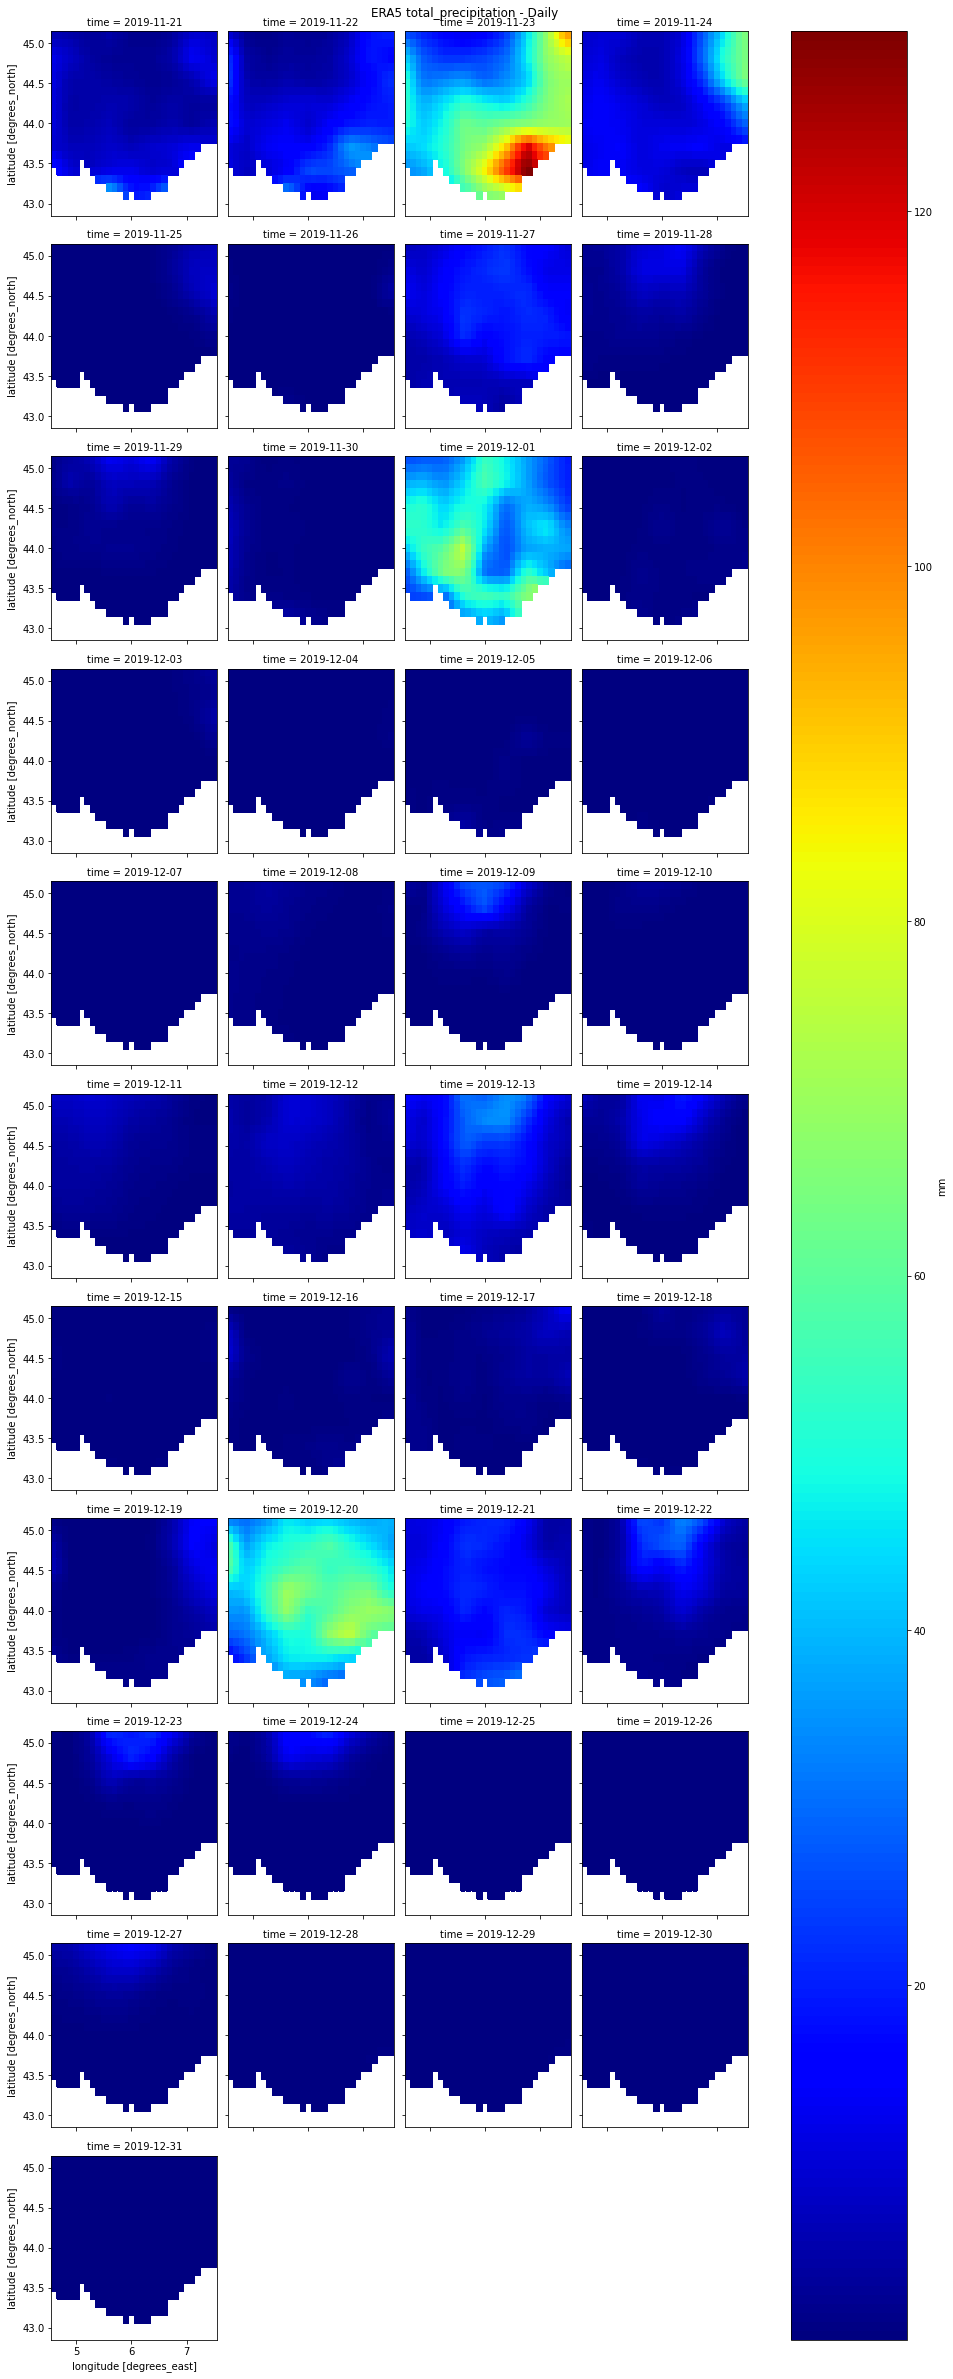

In [75]:
#======== Customization of the sub period of time
date_start = '2019-11-21'# date without time (anlyse will begin at 0:00)
date_end ='2019-12-31'# date without time (anlyse will end at 23:00)

#======== Process
#++++++++ Facet plot maps by hour, day, or by month or averaged by month (depending on the number of days)
nb_days = len(da_daily.loc[date_start:date_end])
if nb_days<=2:
    xarray_src[param].loc[date_start:date_end].plot(col= 'time', subplot_kws= dict(transform= proj), col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)
    temp =  ' - Hourly'    
elif nb_days<=60:
    subset = da_daily.loc[date_start:date_end]
    subset.plot(col= 'time', subplot_kws= dict(transform= proj), col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)
    temp =  ' - Daily'
elif nb_days<=365:
    subset = da_monthly.loc[date_start:date_end]
    subset.plot(col= 'time', subplot_kws= dict(transform= proj), col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)
    temp = ' - Monthly'
else:
    subset = da_monthly.loc[date_start:date_end]
    subset.groupby('time.month').mean('time').plot(col= 'month', subplot_kws= dict(transform= proj), col_wrap= 4, 
                                                       cmap= cmap, cbar_kwargs={"label": units},)
    temp = ' - Interannual mean by month'
plt.gcf().suptitle('ERA5 '+ variable + temp, y=1)
plt.savefig(os.path.join(folder_out, facet_plot_subset_file))

#++++++++ Animation maps
subset = da_daily.loc[date_start:date_end]
hv_plot_day = subset.hvplot(x='longitude', y='latitude',
                        widget_type="scrubber",
                        widget_location="bottom",
                        width=hvplot_width, alpha=0.6, geo= True,  crs= proj, clim=(0, da_daily.max()), cmap= cmap, clabel= units,
#                        coastline= '10m',
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                    # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 
                                )   # StamenTerrain, StamenTerrainRetina, StamenWatercolor, StamenToner, StamenTonerBackground, StamenLabels

subset = xarray_src[param].loc[date_start:date_end]
hv_plot_hour = subset.hvplot(x='longitude', y='latitude',
                        widget_type="scrubber",
                        widget_location="bottom",
                        width=hvplot_width, alpha=0.6, geo= True,  crs= proj, clim=(0, xarray_src[param].max()), cmap= cmap, clabel= units,
#                        coastline= '10m',
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                    # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 
                                )   # StamenTerrain, StamenTerrainRetina, StamenWatercolor, StamenToner, StamenTonerBackground, StamenLabels
hv_plot_day + hv_plot_hour